In [1]:
!pip install kaggle

In [3]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import os

In [4]:
os.environ['KAGGLE_USERNAME'] = 'liudmilashegal'
os.environ['KAGGLE_KEY'] = '/content/kaggle.json'

In [5]:
api = KaggleApi()
api.authenticate()

In [6]:
import kaggle

In [7]:
kaggle.api.dataset_download_files('shariful07/student-mental-health', path='.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/shariful07/student-mental-health


In [8]:
import pandas as pd

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df= pd.read_csv('/content/Student Mental health.csv')

In [11]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [12]:
df.shape

(101, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [14]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [15]:
df_cleaned = df.drop(columns=['Timestamp'])

In [16]:
df_cleaned.isnull().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [17]:
age_mean = df_cleaned['Age'].mean()

In [18]:
df_cleaned['Age'].fillna(age_mean, inplace=True)

In [19]:
df_cleaned.isnull().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [20]:
columns_to_rename = {
    'Choose your gender': 'Gender',
    'What is your CGPA?': 'CGPA',
    'What is your course?': 'CourseNomber',
    'Your current year of Study': 'StudYear',
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'PanicAttack',
    'Did you seek any specialist for a treatment?': 'SeekTreatment',
    'Marital status': 'MaritalStatus'
}

In [21]:
df_cleaned.rename(columns=columns_to_rename, inplace=True)
df_cleaned.head()

,Gender,Age,CourseNomber,StudYear,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SeekTreatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [22]:
column_name = 'Gender'

In [23]:
unique_values = df_cleaned[column_name].unique()
print(unique_values)

['Female' 'Male']


In [24]:
def convert_cgpa(cgpa_range):
    if isinstance(cgpa_range, str):
        lower, upper = cgpa_range.split(' - ')
        return (float(lower) + float(upper)) / 2
    else:
        return cgpa_range

df_cleaned['CGPA'] = df_cleaned['CGPA'].apply(convert_cgpa)

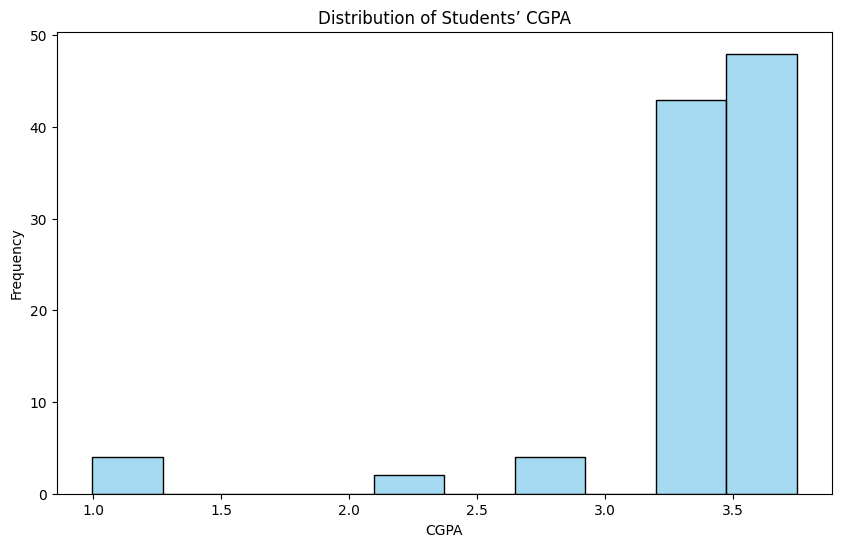

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['CGPA'], kde=False, color='skyblue', bins=10)

plt.title('Distribution of Students’ CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

In [26]:
anxdb = df_cleaned.copy()

In [27]:
anxiety_gender = anxdb.groupby('Gender')['Anxiety'].value_counts(normalize=True).unstack()

In [28]:
anxiety_proportion = anxiety_gender.loc[:, 'Yes']
print(anxiety_proportion)

Gender
Female    0.320000
Male      0.384615
Name: Yes, dtype: float64


In [29]:
anxiety_proportion = anxiety_proportion.reset_index()

In [30]:
anxiety_proportion = anxiety_proportion.rename(columns={'Yes': 'Proportion with Anxiety'})

<ipython-input-31-925de6ca6b6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=anxiety_proportion, x='Gender', y='Proportion with Anxiety', palette='viridis')


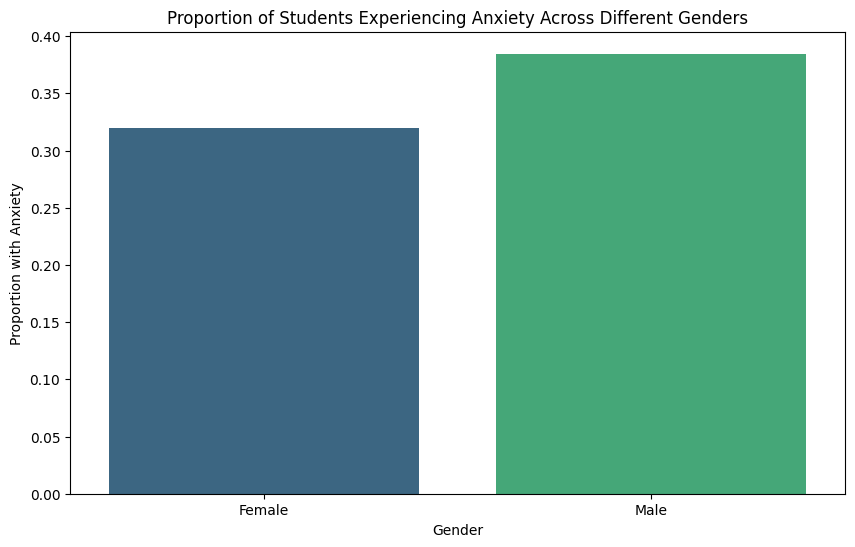

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=anxiety_proportion, x='Gender', y='Proportion with Anxiety', palette='viridis')

plt.title('Proportion of Students Experiencing Anxiety Across Different Genders')
plt.xlabel('Gender')
plt.ylabel('Proportion with Anxiety')

plt.show()

In [32]:
df_panic = df_cleaned.copy()

In [33]:
df_panic['PanicAttack'] = df_panic['PanicAttack'].map({'Yes': 1, 'No': 0})

In [34]:
df_panic.head()

,Gender,Age,CourseNomber,StudYear,CGPA,MaritalStatus,Depression,Anxiety,PanicAttack,SeekTreatment
0,Female,18.0,Engineering,year 1,3.245,No,Yes,No,1,No
1,Male,21.0,Islamic education,year 2,3.245,No,No,Yes,0,No
2,Male,19.0,BIT,Year 1,3.245,No,Yes,Yes,1,No
3,Female,22.0,Laws,year 3,3.245,Yes,Yes,No,0,No
4,Male,23.0,Mathemathics,year 4,3.245,No,No,No,0,No


Text(0, 0.5, 'Occurrence of Panic Attacks (1 = Yes, 0 = No)')

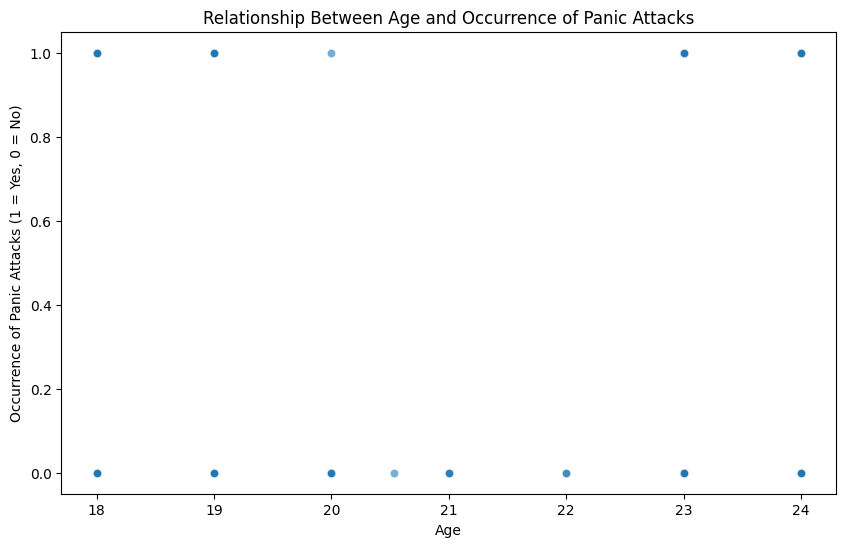

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_panic, x='Age', y='PanicAttack', alpha=0.6)

plt.title('Relationship Between Age and Occurrence of Panic Attacks')
plt.xlabel('Age')
plt.ylabel('Occurrence of Panic Attacks (1 = Yes, 0 = No)')

There is no real corelation between age and panic attacks

In [36]:
subset_columns = ['Age', 'CGPA', 'Depression', 'Anxiety', 'PanicAttack']
df_subset = df_cleaned[subset_columns].copy()

In [37]:
df_subset['Depression'] = df_subset['Depression'].map({'Yes': 1, 'No': 0})
df_subset['Anxiety'] = df_subset['Anxiety'].map({'Yes': 1, 'No': 0})
df_subset['PanicAttack'] = df_subset['PanicAttack'].map({'Yes': 1, 'No': 0})

<Figure size 1200x800 with 0 Axes>

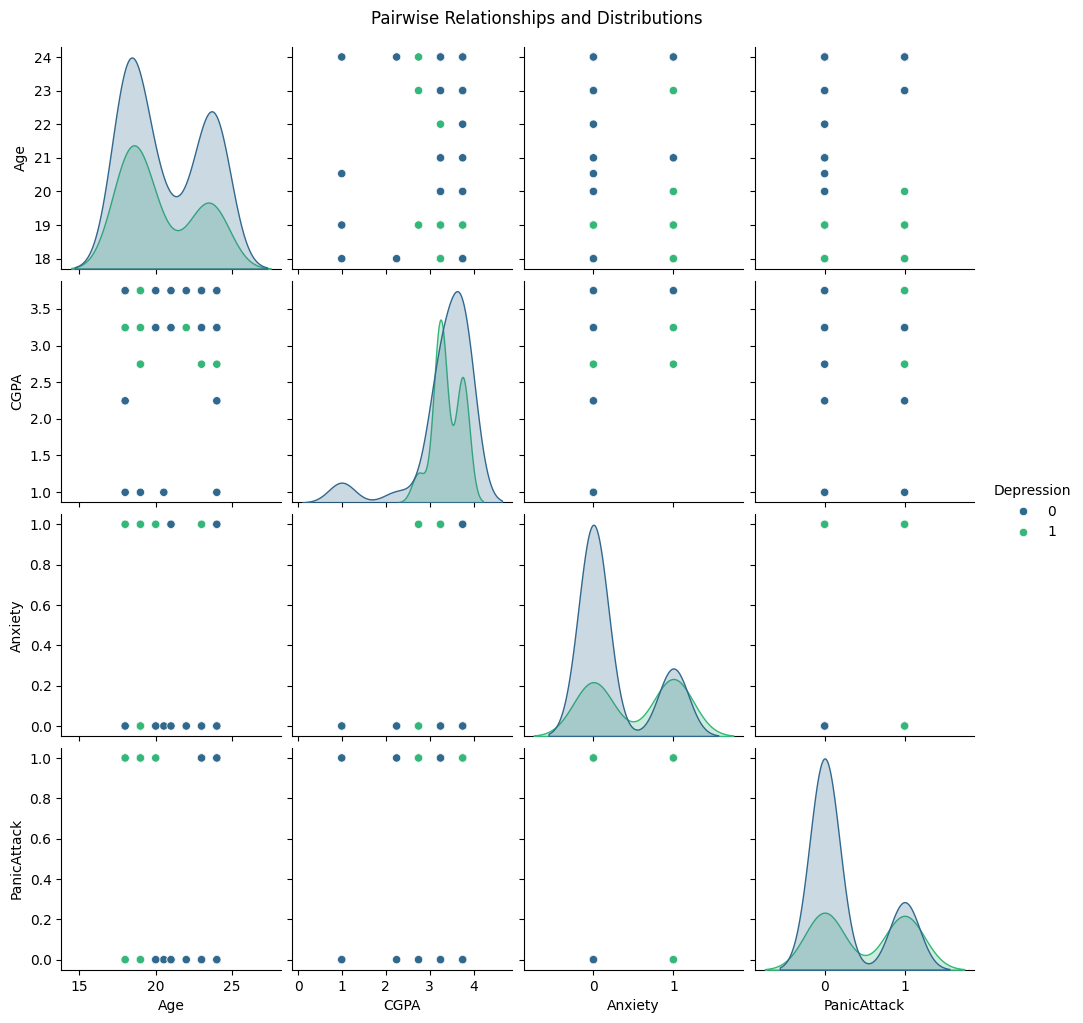

In [38]:
plt.figure(figsize=(12, 8))
pair_plot = sns.pairplot(df_subset, hue='Depression', palette='viridis')

# Customize the plot with a title
pair_plot.fig.suptitle('Pairwise Relationships and Distributions', y=1.02)

# Display the plot
plt.show()

In [39]:
def convert_cgpa(cgpa_range):
    if isinstance(cgpa_range, str):
        lower, upper = cgpa_range.split(' - ')
        return (float(lower) + float(upper)) / 2
    else:
        return cgpa_range

df_subset['CGPA'] = df_subset['CGPA'].apply(convert_cgpa)

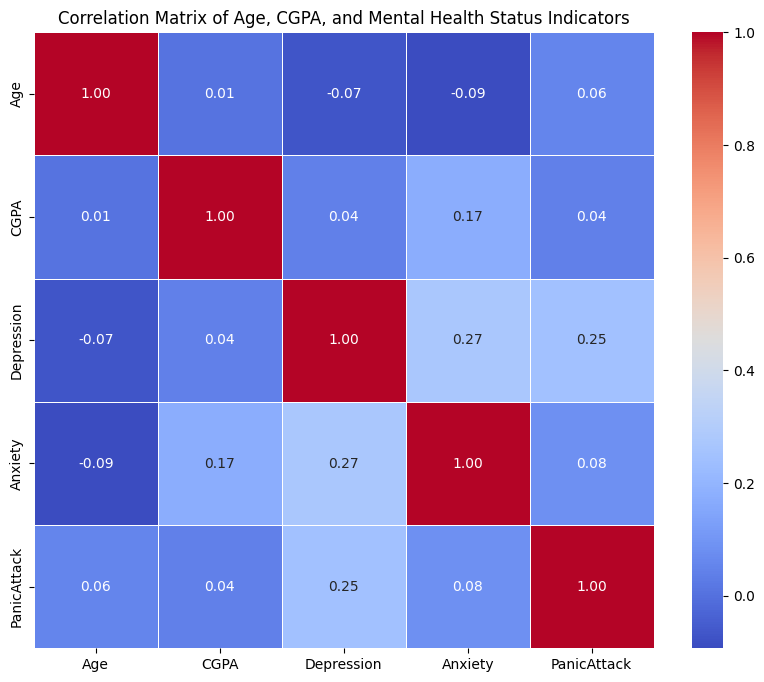

In [40]:
correlation_matrix = df_subset.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of Age, CGPA, and Mental Health Status Indicators')

plt.show()

In [41]:
cgdep_df = df_cleaned.copy()

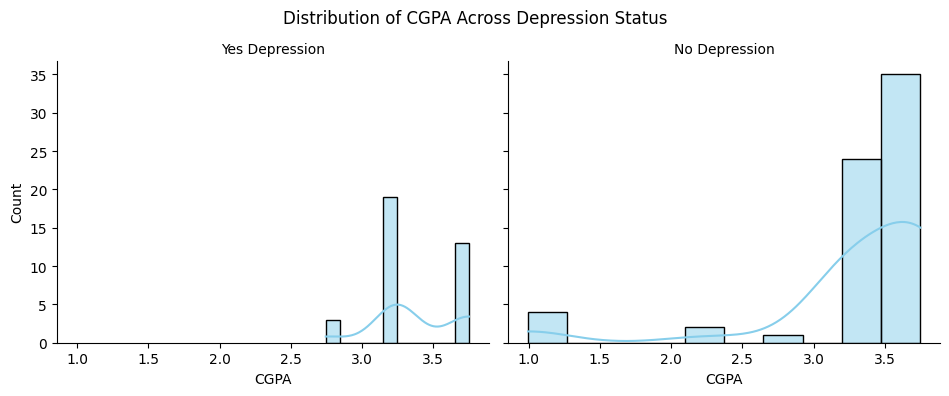

In [43]:
g = sns.FacetGrid(cgdep_df, col='Depression', height=4, aspect=1.2, sharex=True, sharey=True)

g.map(sns.histplot, 'CGPA', bins=10, kde=True, color='skyblue')

g.set_axis_labels('CGPA', 'Count')
g.set_titles('{col_name} Depression')

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of CGPA Across Depression Status')

plt.show()